# Polynomial Regression

* import, podział na X, y
* model Simple Linear Regression
* model Polynomial Linear Regression
* * Stworzenie matrixa z wyzszymi potegami zmiennej niezależnej, `from sklearn.preprocessing import PolynomialFeatures`
* Wizualizacje


## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

## Training the Linear Regression model on the whole dataset

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree= 3)
#poly_reg.fit(X)
#poly_reg.transform(X)
X_poly = poly_reg.fit_transform(X)


In [9]:
print(X_poly)

[[   1.    1.    1.    1.]
 [   1.    2.    4.    8.]
 [   1.    3.    9.   27.]
 [   1.    4.   16.   64.]
 [   1.    5.   25.  125.]
 [   1.    6.   36.  216.]
 [   1.    7.   49.  343.]
 [   1.    8.   64.  512.]
 [   1.    9.   81.  729.]
 [   1.   10.  100. 1000.]]


In [10]:
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression()

## Visualising the Linear Regression results

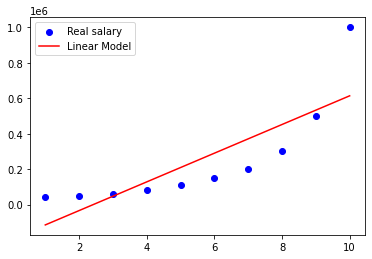

In [11]:
plt.rcdefaults()
plt.scatter(x = X, y = y, label = "Real salary", color = 'blue')
plt.plot(X, lin_reg.predict(X), label = "Linear Model", color = 'red')
plt.legend()
plt.show()

## Visualising the Polynomial Regression results

In [13]:
lin_reg_2.predict(X_poly)

array([ 14902.09790211,  78759.90675991,  94960.37296038,  88223.77622378,
        83270.3962704 , 104820.51282052, 177594.40559441, 326312.35431235,
       575694.63869463, 950461.53846152])

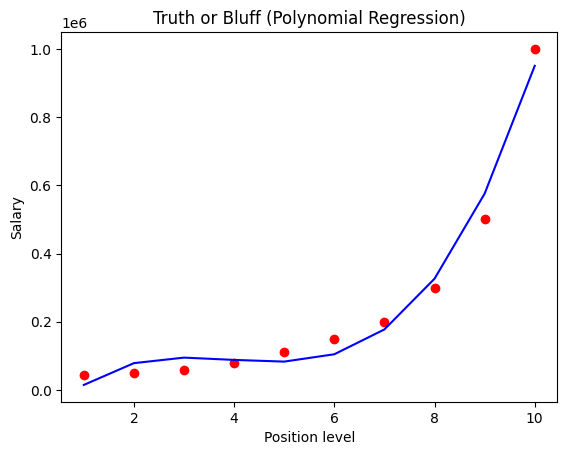

In [158]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

# to samo co wyzej. tylko punkty na osi X są gęsciej. wiec jest linie jest gładsza

In [159]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid


array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

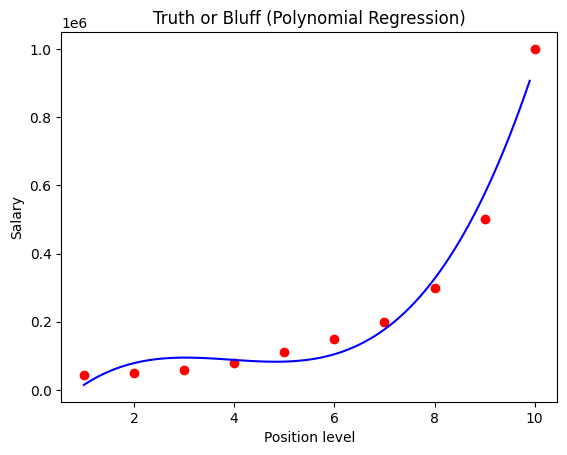

In [160]:
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [161]:
lin_reg.predict([[6.5]])

array([330378.78787879])

## Predicting a new result with Polynomial Regression

## `poly_reg.fit_transform([[6.5]])` tworzy array z kolejnymi potęgami naszej zmiennej

In [162]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([133259.46969697])

In [163]:
poly_reg.fit_transform([[6.5]])

array([[  1.   ,   6.5  ,  42.25 , 274.625]])